# <a name="0"> Multiple Linear Regression </a>


## Regression Model 

In this notebook, we build, train, and tune by [__GridSearchCV__](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) a [Multiple linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to predict  
sales in multi social media network

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Exploratory Data Analysis</a>
3. <a href="#3">Select features to build the model</a>
4. <a href="#4">Resample Dataset</a>
4. <a href="#5">Training and test datasets</a>
5. <a href="#6">Data processing with Pipeline and ColumnTransformer</a>
6. <a href="#7">Train and tune a classifier</a>
7. <a href="#8">Test the classifier</a>

In [2]:
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install scipy

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
!pip install --upgrade pip

  Using cached pip-20.2.3-py2.py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2


In [4]:
!pip install statsmodels

  Using cached statsmodels-0.12.0-cp36-cp36m-manylinux1_x86_64.whl (9.5 MB)
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)


In [5]:
!pip install yellowbrick

<img src="https://rhyme.com/assets/img/logo-dark.png" align="center"> 

<h2 align="center">Multiple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

### Task 1: Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


### Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [7]:
df = pd.read_csv('data.csv')
df.shape

(200, 4)

In [8]:
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

### Task 3: Relationship between Features and Response

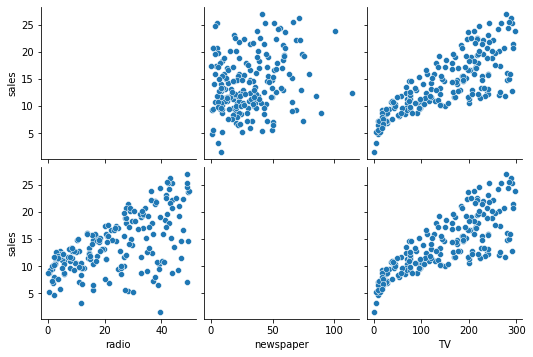

In [12]:
sns.pairplot(
    df,
    x_vars=["radio", "newspaper","TV"],
    y_vars=["sales","sales"]
)

### Task 4: Multiple Linear Regression - Estimating Coefficients

In [13]:
from sklearn.linear_model import LinearRegression

x = df[['TV' , 'radio' , 'newspaper']]
y = df['sales']

lml = LinearRegression()
lml_preds = lml.fit(x,y)



In [14]:
print(lml.intercept_)

2.938889369459412


In [15]:
print(lml.coef_)

[ 0.04576465  0.18853002 -0.00103749]


In [16]:
list(zip(['TV','radio' ,'newspaper'] , lml.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820448),
 ('newspaper', -0.0010374930424763285)]

apply back propagation on this model 

In [17]:
import statsmodels.formula.api as sm
import statsmodels.api as sm

from sklearn.model_selection import train_test_split


def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j]== maxVar):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    
    return x
 



In [18]:
x = np.append(arr = np.ones((df.shape[0] , 1)) , values = x , axis =1)

In [19]:
# # thresh
SL = 0.05
X_opt =  x[: ,[0,1,2]]
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 25 Sep 2020   Prob (F-statistic):           4.83e-98
Time:                        20:14:10   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

In [20]:
lml2 = LinearRegression()
lml2.fit(X_Modeled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# after backword elimination 
1. <a> TV & radio is very big corrrelation on sales </a>
2. <a> newspaper is very low </a> 

###### just you should apply feature engineering on model

1. <a> first apply model without feature engineeering </a>
2. <a> apply model with feature engineeering </a> 

### Task 5: Feature Selection

In [21]:
from sklearn.metrics import r2_score

x = df[['TV' , 'radio' , 'newspaper']]
y = df['sales']

lml = LinearRegression()
lml1 = lml.fit(x,y)
lml11 = lml1.predict(x)
print("r^score : " , r2_score(y,lml11))

r^score :  0.8972106381789522


In [22]:
# after applied feature engineering


lm2 = LinearRegression()
lml2 = lm2.fit(df[['TV' , 'radio']],y)
lml11 = lml2.predict(df[['TV' , 'radio']])
print("r^score : " , r2_score(y,lml11))

r^score :  0.8972106381789522


In [45]:
lml11[:5]

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186])

In [47]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

### 6. save model

In [59]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(lml2) 
  
# Load the pickled model 
knn_from_pickle = pickle.loads(saved_model) 
  


In [67]:
import boto3
from botocore.client import Config

ACCESS_KEY_ID = ''
ACCESS_SECRET_KEY = ''
BUCKET_NAME = 'ahmed-ai'
FILE_NAME = 'data.csv';


data = open(FILE_NAME, 'rb')

# S3 Connect
s3 = boto3.resource(
    's3',
    aws_access_key_id=ACCESS_KEY_ID,
    aws_secret_access_key=ACCESS_SECRET_KEY,
    config=Config(signature_version='s3v4')
)

# Image download
s3.Bucket(BUCKET_NAME).put_object(key = 'data.csv' , body =data ); # Change the second part
# This is where you want to download it too.

print ("Done")

ParamValidationError: Parameter validation failed:
Missing required parameter in input: "Key"
Unknown parameter in input: "key", must be one of: ACL, Body, Bucket, CacheControl, ContentDisposition, ContentEncoding, ContentLanguage, ContentLength, ContentMD5, ContentType, Expires, GrantFullControl, GrantRead, GrantReadACP, GrantWriteACP, Key, Metadata, ServerSideEncryption, StorageClass, WebsiteRedirectLocation, SSECustomerAlgorithm, SSECustomerKey, SSECustomerKeyMD5, SSEKMSKeyId, SSEKMSEncryptionContext, RequestPayer, Tagging, ObjectLockMode, ObjectLockRetainUntilDate, ObjectLockLegalHoldStatus
Unknown parameter in input: "body", must be one of: ACL, Body, Bucket, CacheControl, ContentDisposition, ContentEncoding, ContentLanguage, ContentLength, ContentMD5, ContentType, Expires, GrantFullControl, GrantRead, GrantReadACP, GrantWriteACP, Key, Metadata, ServerSideEncryption, StorageClass, WebsiteRedirectLocation, SSECustomerAlgorithm, SSECustomerKey, SSECustomerKeyMD5, SSEKMSKeyId, SSEKMSEncryptionContext, RequestPayer, Tagging, ObjectLockMode, ObjectLockRetainUntilDate, ObjectLockLegalHoldStatus

In [63]:
# s3 = boto3.client('s3')
with open("data.csv", "rb") as f:
    print('done')
    s3.upload_fileobj('data.csv', "ahmed-ai", "model.pk")

done


ValueError: Fileobj must implement read

### Task 6: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [32]:
from sklearn.model_selection import train_test_split

x = df[['TV' , 'radio' , 'newspaper']]
y =df['sales']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =1)

In [39]:
print(y_train.shape)

(150,)


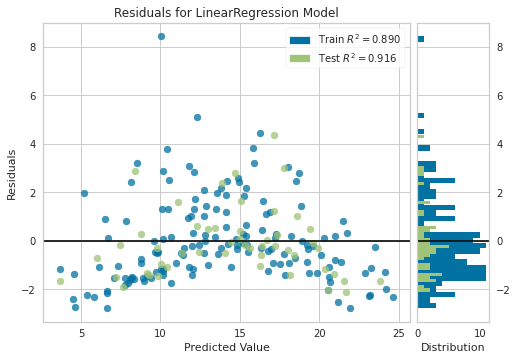

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [44]:
from yellowbrick.regressor import ResidualsPlot , PredictionError 

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
# visualizer.show()                 

### Task 7: Interaction Effect (Synergy)

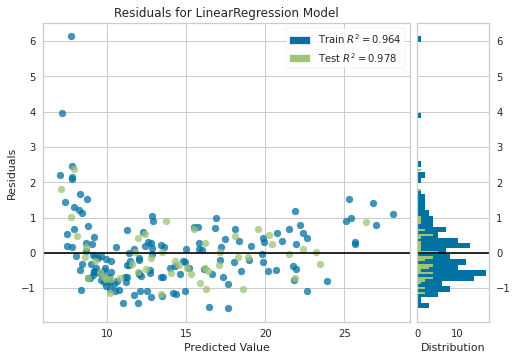

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [49]:
df['interction'] = df['TV'] * df['radio']

from sklearn.model_selection import train_test_split

x = df[['TV' , 'radio' ,'newspaper' , 'interction']]
y =df['sales']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =1)

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
